In [2]:
import os

import torch
# import torchvision
from torchvision.transforms import v2

# from torch import nn
# from torchsummary import summary

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image
import tqdm.notebook as tqdm

%load_ext autoreload

from data_loaders import *
%autoreload 2
from training_utils import *
%autoreload 2
from cnn_model import *
%autoreload 2

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
test_prop = 0.2
val_prop = 0.2

batch_size = 64

img_type = 'raw-derivative.-60'
# img_type = 'raw-original'
# img_type = 'raw-fft'

In [14]:
# Creating the datasets

transform = v2.Compose([
    v2.ToTensor(),
    v2.RandomHorizontalFlip(),
    v2.RandomVerticalFlip(),
    v2.Normalize(mean=[0], std=[67]),
    v2.ToDtype(torch.float, scale=True),
    # v2.ColorJitter(0.5, None, None, None),
    # v2.GaussianBlur(kernel_size=(5, 5), sigma=(0.2, 0.5))
])

target_transform = v2.Compose([
    v2.ToTensor(),
    v2.Normalize(mean=[0], std=[67]),
    v2.ToDtype(torch.float, scale=True),
    # v2.ColorJitter(0.5, None, None, None),
    # v2.GaussianBlur(kernel_size=(5, 5), sigma=(0.2, 0.5))
])


train_labeled_data = CloudDetectionTrain(
    transform=transform
)

test_labeled_data = CloudDetectionTrain(
    target_transform=target_transform
)


In [19]:
dsl_merged

,index,feature_uid,skycam_uid,pano_uid,batch_id_x,batch_id_y,run_dir,fname,frame_offset,module_id,frame_unix_t,label
0,0,f80f88f1452ee98ffbbb52b7cac687f108c54df0,4168b047937abd529e6f5d2f2ebee1d9790b4b29,27b4c948c6dc91b45bed83d5563286ea6d4d14b8,7,7,obs_Lick.start_2023-09-28T06:01:09Z.runtype_en...,start_2023-09-28T06:01:58Z.dp_img16.bpp_2.modu...,1104906,254,1.695881e+09,clear_night_sky
1,1,f3f6c399e8fb070659e9590a8e8307d0665a752c,a7b46980eb830ada5d42bf1d9710b4cc4e1ad856,45725a0d47277754a6c5a4b8dd0a05b35a3b1ee9,7,7,obs_Lick.start_2023-09-28T06:01:09Z.runtype_en...,start_2023-09-28T06:04:42Z.dp_img16.bpp_2.modu...,790102,254,1.695881e+09,clear_night_sky
2,2,6a7a7f2584a884f7912c1209d02941e16bfb5426,b367e5111877eb6615e182da49053af9df1382bf,f5684a79a67eab3f49bb24661bf2899018176305,7,7,obs_Lick.start_2023-09-28T06:01:09Z.runtype_en...,start_2023-09-28T06:04:42Z.dp_img16.bpp_2.modu...,1290102,254,1.695881e+09,clear_night_sky
3,3,60f76a7855316fe05d8861837c62d30b374a8329,0793bbd1c72f9170e8e084b5fa8478ae37225502,12bdb823015cecd0856e1c9fd8168b68a2656aa3,7,7,obs_Lick.start_2023-09-28T06:01:09Z.runtype_en...,start_2023-09-28T06:07:19Z.dp_img16.bpp_2.modu...,215298,254,1.695881e+09,clear_night_sky
4,4,ef1a675d18d31f2e44025e660df5530bb57081d0,19276cbf76f6f5666f214111ae50e5238fa270c1,88b80a9c1f74a936e0318d7d04cc98ac3c64e23c,7,7,obs_Lick.start_2023-09-28T06:01:09Z.runtype_en...,start_2023-09-28T06:07:19Z.dp_img16.bpp_2.modu...,975298,254,1.695881e+09,clear_night_sky
...,...,...,...,...,...,...,...,...,...,...,...,...
8794,8794,ea3e671853515c722d2ede49d65d7412107e3b4e,aa66b88dcd264733af62ce2e994fa6a7a492d0f2,23cc9fa1ed54054075229e4f2916fc9f8413862d,0,0,obs_Lick.start_2023-08-15T07:15:50Z.runtype_sc...,start_2023-08-15T09:43:41Z.dp_img16.bpp_2.modu...,48602,3,1.692093e+09,not_clear_cloudy
8795,8795,b2335425592965311fee430466189da9b9abea17,de76dc4c394ebc7fd3d77eccd0d53a8f9c84a66e,5203208877a54615e308a4340a6082ba230af80e,0,0,obs_Lick.start_2023-08-15T07:15:50Z.runtype_sc...,start_2023-08-15T09:43:41Z.dp_img16.bpp_2.modu...,908602,3,1.692093e+09,not_clear_cloudy
8796,8796,c04941a7c04dbbc9d7f80037934b9239ef676fd7,de76dc4c394ebc7fd3d77eccd0d53a8f9c84a66e,a5df966d1fd07f08fe372ab685c2f6fd35a34dd5,0,0,obs_Lick.start_2023-08-15T07:15:50Z.runtype_sc...,start_2023-08-15T09:43:41Z.dp_img16.bpp_2.modu...,1008602,3,1.692093e+09,not_clear_cloudy
8797,8797,9d53913d1566c9760ac1587888163d71d0e45643,de76dc4c394ebc7fd3d77eccd0d53a8f9c84a66e,c2e0cc7419cfe5127b4371294e91adf47be01e9e,0,0,obs_Lick.start_2023-08-15T07:15:50Z.runtype_sc...,start_2023-08-15T09:43:41Z.dp_img16.bpp_2.modu...,1108602,3,1.692093e+09,not_clear_cloudy


In [18]:
pano_df = train_labeled_data.dataset_manager.main_dfs['pano']
feature_df = train_labeled_data.dataset_manager.main_dfs['feature']
feature_merged_df = feature_df.reset_index().merge(pano_df, on = 'pano_uid').set_index('index')
dsl_merged = feature_merged_df.merge(train_labeled_data.dsl_df, on = 'feature_uid').reset_index()

def data_split(test_prop, val_prop, batch_id):
    assert 0 <= test_prop <= 1, 0 <= val_prop <= 1
    batch_data = dsl_merged[dsl_merged['batch_id_x'] == batch_id].sort_values(by = 'frame_unix_t')
    
    test_split = int(len(batch_data) * test_prop)
    ntrain = len(batch_data) - test_split
    val_split = int(ntrain * val_prop)
    
    test_idx = batch_data[:test_split].index.values
    val_idx = batch_data[test_split: test_split + val_split].index.values
    train_idx = batch_data[test_split + val_split:].index.values
    
    return test_idx, val_idx, train_idx

def get_test_val_train_indices(test_prop, val_prop):
    test_indices = np.array([], dtype=np.int64)
    val_indices = np.array([], dtype=np.int64)
    train_indices = np.array([], dtype=np.int64)

    for batch_id in pano_df['batch_id'].unique():
        test_idx, val_idx, train_idx = data_split(test_prop, val_prop, batch_id)
        test_indices = np.concatenate((test_indices, test_idx))
        val_indices = np.concatenate((val_indices, val_idx))
        train_indices = np.concatenate((train_indices, train_idx))
    return test_indices, val_indices, train_indices

[   0  264  132 ... 6883 7567 8251] [ 290  158   27 ... 6993 8360 7676] [ 179   47  312 ... 8113 8114 8798]
test_prop = 19.96%
train_prop = 64.08%
val_prop = 15.97%
Percent cloudy = 55.052% (4844 / 8799)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


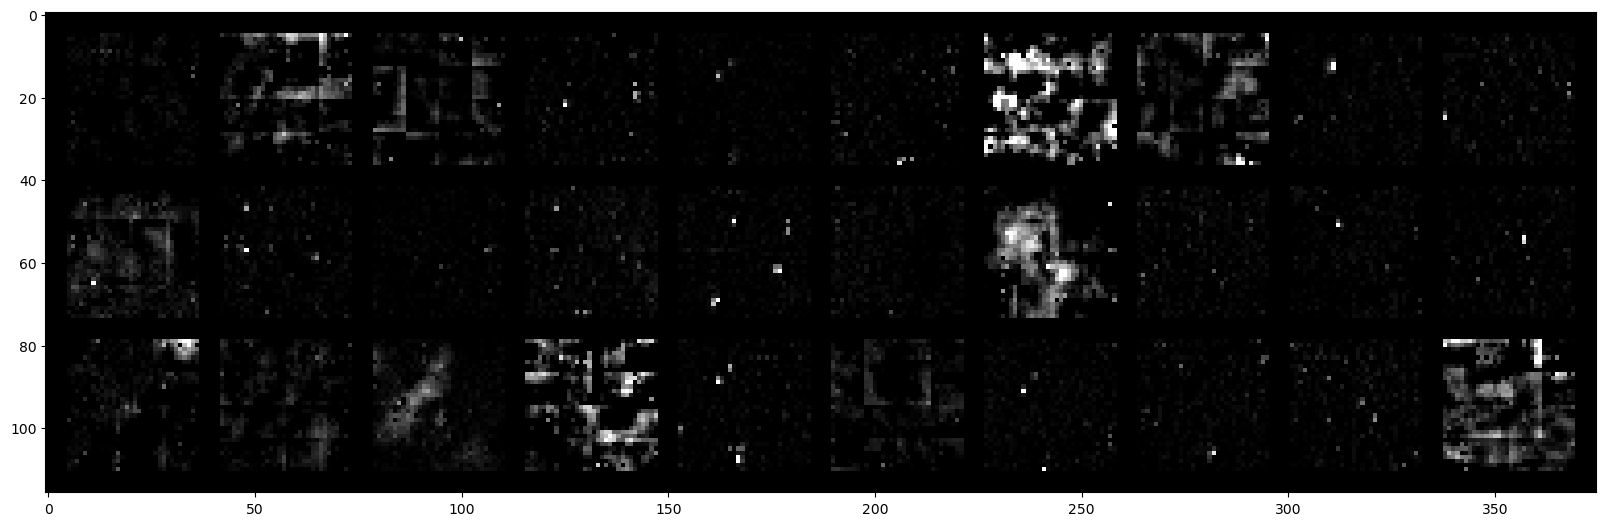

In [20]:
dataset_size = len(dsl_merged)
# dataset_indices = np.arange(dataset_size)

# np.random.shuffle(dataset_indices)

# # Test / Train split
# test_split_index = int(np.floor(test_prop * dataset_size))
# trainset_indices, test_idx = dataset_indices[test_split_index:], dataset_indices[:test_split_index]

# # Train / Val split
# trainset_size = len(trainset_indices)
# val_split_index = int(np.floor(val_prop * trainset_size))
# train_idx, val_idx = trainset_indices[val_split_index:], trainset_indices[:val_split_index]
test_idx, val_idx, train_idx = get_test_val_train_indices(test_prop, val_prop)
print(test_idx, val_idx, train_idx)

test_loader = torch.utils.data.DataLoader(
  dataset=test_labeled_data,
  batch_size=batch_size,
  sampler=torch.utils.data.SubsetRandomSampler(test_idx)
)

train_loader = torch.utils.data.DataLoader(
  dataset=train_labeled_data,
  batch_size=batch_size,
  sampler=torch.utils.data.SubsetRandomSampler(train_idx)
)

val_loader = torch.utils.data.DataLoader(
  dataset=train_labeled_data,
  batch_size=batch_size,
  sampler=torch.utils.data.sampler.SubsetRandomSampler(val_idx)
)


# Get dataset stats

print(f'test_prop = {100 * len(test_idx) / dataset_size:.2f}%\n'
      f'train_prop = {100 * len(train_idx) / dataset_size:.2f}%\n'
      f'val_prop = {100 * len(val_idx) / dataset_size:.2f}%'
)

train_labeled_data.dsl_df
feature_uid = train_labeled_data.dsl_df.loc[:, 'feature_uid'].iloc[0]
train_labeled_data[0][0]
num_clear = len(train_labeled_data.dsl_df.loc[train_labeled_data.dsl_df.label == 'clear_night_sky'])
num_cloudy = len(train_labeled_data.dsl_df.loc[train_labeled_data.dsl_df.label == 'not_clear_cloudy'])
print(f'Percent cloudy = {100 *num_cloudy / len(train_labeled_data):.3f}% ({num_cloudy} / {len(train_labeled_data)})')

rn = np.random.choice(len(train_labeled_data), size=30, replace=False)
train_labeled_data.dataset_manager.main_dfs['feature']['batch_id'].unique()
images = [train_labeled_data[i][0][img_type] for i in rn]
plt.figure(figsize=(20,10))
plt.imshow(torchvision.utils.make_grid(torch.stack(images), nrow=10, padding=5).numpy().transpose((1, 2, 0)));

In [21]:
# Code for finding the intersection between two arrays
arr1 = set(np.array([1,2,3,4,5]))
arr2 = set(np.array([1,2,3,40,50]))
arr1.intersection(arr2)

{1, 2, 3}

In [22]:
# Use that code here:
test = set(test_idx)
train = set(train_idx)
val = set(val_idx)
print(test.intersection(train))  # empty set, showing there is no overlap between test and train indices.
print(test.intersection(val))    # empty set, showing there is no overlap between test and val indices.

set()
set()


In [23]:
# Training config

learning_rate = 0.001
# momentum=0.9

model = CloudDetection()

#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-6)#, momentum=momentum)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
loss_fn = nn.CrossEntropyLoss()

trainer = Trainer(
    model, optimizer, loss_fn, train_loader, val_loader,
    epochs=15, gamma=0.9, do_summary=False,
    img_type=img_type
);

In [ ]:
trainer.train()



Epoch 1


  0%|          | 0/89 [00:00<?, ?batches/s]

  0%|          | 0/28 [00:00<?, ?batches/s]

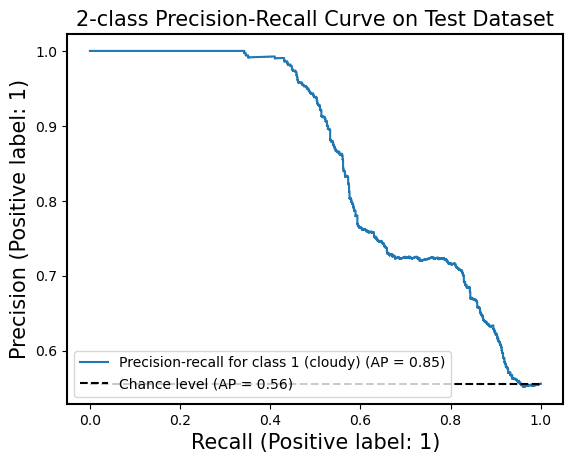

Test: 	loss = 0.1282,  acc = 1706/1759 (96.99%)


In [50]:
tester = Tester(model, loss_fn, test_loader, img_type)
tester.eval()

In [ ]:
trainer.make_training_plots(do_save=False)